# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Muhammad Salman Alfarisi]
- **Email:** [alfa10869@gmail.com]
- **ID Dicoding:** [Muhammad Salman Alfarisi
]

## Menentukan Pertanyaan Bisnis

- Apa faktor utama yang memengaruhi total penyewaan sepeda per hari? (kolom cnt di day_df)
- Bagaimana pola penyewaan sepeda berdasarkan jam pada hari kerja dibandingkan dengan akhir pekan? (hour_df)

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Memuat tabel day

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Salman636/Submision-Dicoding-Data-Analyst/refs/heads/main/data/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Memuat tabel hour

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Salman636/Submision-Dicoding-Data-Analyst/refs/heads/main/data/Bike-sharing-dataset/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Pada day_df menampilkan data peminjaman sepeda dalam kurun waktu per hari
- pada hour_df menampilkan data peminjaman sepeda dalam kurun waktu per jam

### Assessing Data

#### Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0


#### Menilai data hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())


Jumlah duplikasi:  0


##### **Insight:**
- Pada tabel day tidak terdapat masalah atau keanehan
- pada tabel hour tidak terdapat masalah atau keanehan


### Cleaning Data

In [10]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- pada kedua data pada tabel day_df dan hour_df  terdapat sebuah masalah pada tipe data "dteday" dari objek diubah menjadi date time

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [11]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [12]:
day_df["cnt"].agg(['max', 'min'])

,cnt
max,8714
min,22


In [13]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).sort_values(('cnt', 'max'), ascending=False)

instant   cnt                                
       nunique   max   min         mean          std
season                                              
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261
2          184  8362   795  4992.331522  1695.977235
1          181  7836   431  2604.132597  1399.942119

In [14]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).sort_values(('cnt', 'max'), ascending=False)

instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

### Explore data hour_df

In [15]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [16]:
hour_df["cnt"].agg(['max', 'min'])

,cnt
max,977
min,1


In [17]:
hour_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).sort_values(('cnt', 'max'), ascending=False)

instant  cnt                            
           nunique  max min        mean         std
workingday                                         
1            11865  977   1  193.207754  185.107477
0             5514  783   1  181.405332  172.853832

In [18]:
hour_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).sort_values(('cnt', 'max'), ascending=False)

instant  cnt                            
        nunique  max min        mean         std
weekday                                         
3          2475  977   1  191.130505  190.894464
4          2471  976   1  196.436665  188.011923
2          2453  970   1  191.238891  187.820480
1          2479  968   1  183.744655  179.514167
5          2487  957   1  196.135907  174.076894
6          2512  783   1  190.209793  179.820569
0          2502  776   1  177.468825  168.167710

In [19]:
hour_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).sort_values(('cnt', 'max'), ascending=False)

instant  cnt                           
        nunique  max min       mean         std
holiday                                        
0         16879  977   1  190.42858  181.981435
1           500  712   1  156.87000  156.757478

**Insight:**
- day_df <br>
pada data day_df piminjaman terbanyak mencapai 8714 orang, dan paling sedikit 22 orang. pada saat musim gugur terdapat peminjaman sepeda terbanyak daripada musim yang lain. pada saat cuaca terang juga lebih banyak orang yang meminjam sepeda
- hour_df <br>
pada data hour_df disaat hari kerja lebih banyak pelanggan daripada saat hari libur, dan pada hari rabu lebih banyak pelanggan daripada hari lainnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor utama yang memengaruhi total penyewaan sepeda per hari? (kolom cnt pada day_df)

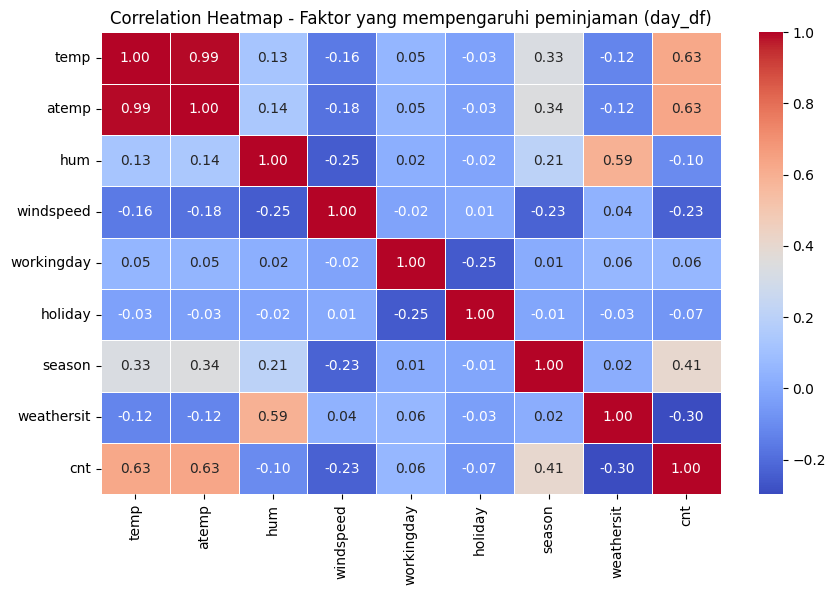

In [20]:
correlation = day_df[['temp', 'atemp', 'hum', 'windspeed', 'workingday', 'holiday', 'season', 'weathersit', 'cnt']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Faktor yang mempengaruhi peminjaman (day_df)")
plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan jam pada hari kerja dibandingkan dengan akhir pekan? (hour_df)

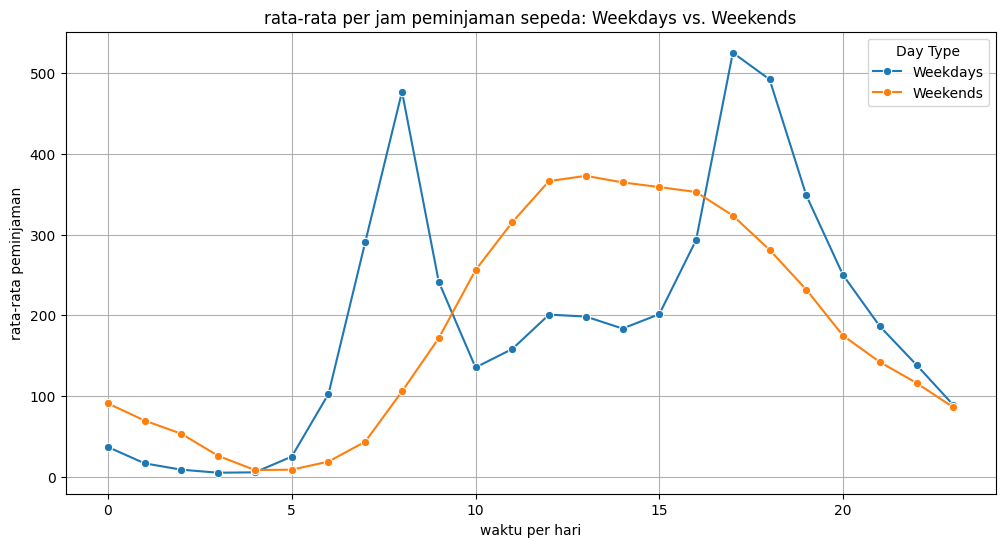

In [21]:
# pemisahan weekends dan weekdays
hour_df['day_type'] = hour_df['workingday'].apply(lambda x: 'Weekdays' if x == 1 else 'Weekends')

# rata-rata per jam weekends dan weekdays
avg_rentals_by_hour = hour_df.groupby(['day_type', 'hr'])['cnt'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rentals_by_hour, x='hr', y='cnt', hue='day_type', marker="o")
plt.title("rata-rata per jam peminjaman sepeda: Weekdays vs. Weekends")
plt.xlabel("waktu per hari")
plt.ylabel("rata-rata peminjaman")
plt.legend(title="Day Type")
plt.grid(True)
plt.show()


**Insight:**
1. yang mempengaruhi peminjaman sepeda per hari adalah <br>
- suhu (temp, atemp): dapat dilihat pada Heatmap korelasi jika suhu memiliki korelasi paling besar daripada yang lain  
- musim : faktor kedua yang mempengaruhi peminjaman per hari adalah musim dengan nilai korelasi 0,41
- hari kerja : hari kerja juga mempengaruhi peminjaman per hari dibuktikan dengan nilai korelasi postif
2. peminjaman sepeda mengalami kenaikan pada saat hari kerja dibandingan hari libur

## Analisis Lanjutan (Opsional)

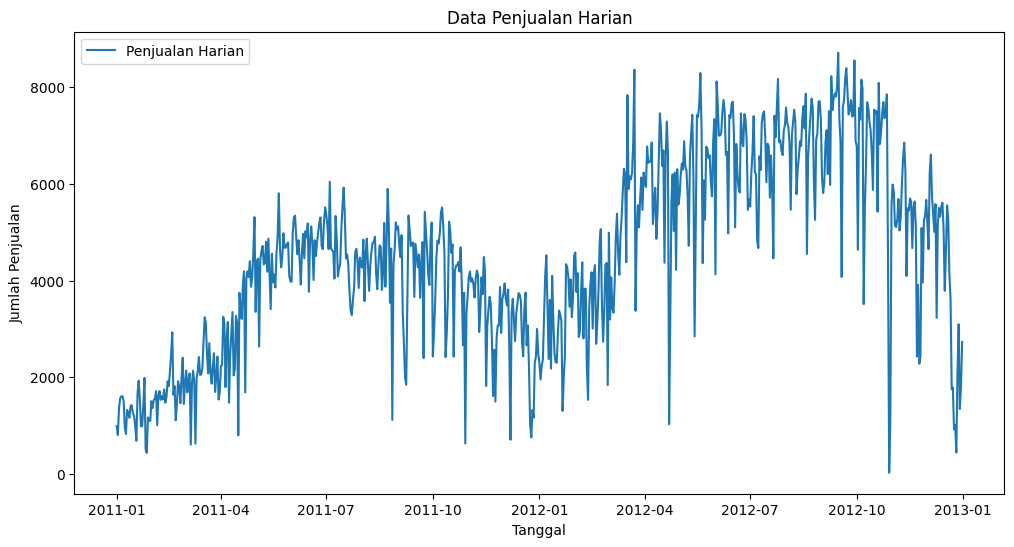

In [22]:
day_df.set_index('dteday', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(day_df['cnt'], label='Penjualan Harian')
plt.title('Data Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.show()


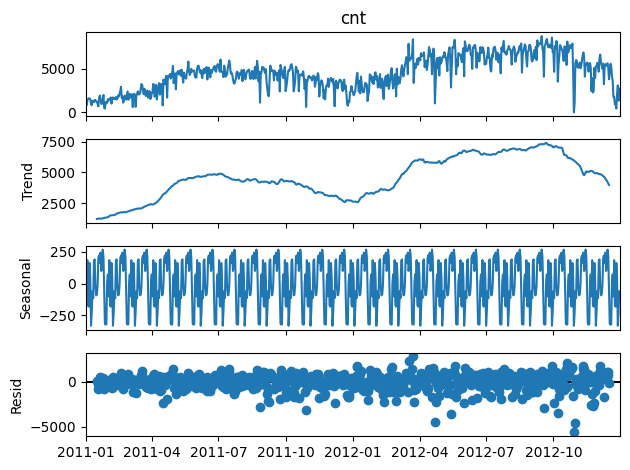

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Melakukan dekomposisi
result = seasonal_decompose(day_df['cnt'], model='additive', period=30)

# Plot hasil dekomposisi
result.plot()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    cnt   No. Observations:                  731
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6029.413
Date:                Sun, 19 Jan 2025   AIC                          12070.826
Time:                        14:30:03   BIC                          12098.385
Sample:                    01-01-2011   HQIC                         12081.459
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4776      0.026    -18.279      0.000      -0.529      -0.426
ar.L2         -0.3964      0.033    -12.074      0.000      -0.461      -0.332
ar.L3         -0.3488      0.039     -8.928      0.0

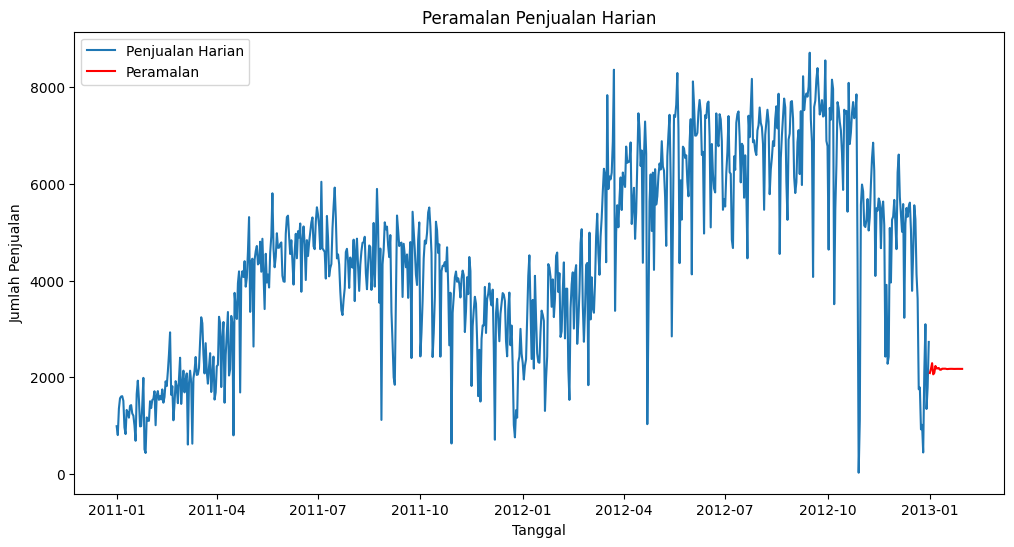

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Membuat dan melatih model ARIMA
model = ARIMA(day_df['cnt'], order=(5, 1, 0))
model_fit = model.fit()

# Melihat ringkasan hasil model
print(model_fit.summary())

# Membuat peramalan
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(day_df['cnt'], label='Penjualan Harian')
plt.plot(forecast, label='Peramalan', color='red')
plt.title('Peramalan Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.show()


## Conclusion

- Suhu, musim, dan hari mempengaruhi peminjaman sepeda
- jika dilihat dari tren peminjaman sepeda akan mengalami penurunan daripada tahun lalu